In [99]:
import pandas as pd

In [100]:
df=pd.read_excel("KFC_INDIA_Reviews.xlsx")

In [101]:
df.head(10)

,Name,Ratings,Emotion,Comments
0,KunalK_13,1.0,Horrible experience with KFC salt lake,"Food was horrible , may be due to Pandemic the..."
1,moogul818,5.0,Standard KFC Fare- City Centre Mall 1,This outlet is on the first floor of the City ...
2,animeshpat,3.0,"Average food, overpriced","Average food quality, Overpriced as per qualit..."
3,shivaraikod,3.0,Good service,The service and the way orders are taken and d...
4,gourabg334,4.0,What more to say about KFC,Chicken lovers need no review to visit KFC. He...
5,Vacation8252201,1.0,KFC staff I'll mannered,I m really sorry to say about itBut KFC staff ...
6,Louisa Jane,3.0,i love kfc but.,im not talking about this branch but they need...
7,Niladri S8Reviewed,4.0,As usual,this KFC is just like allother Kfc chains. Foo...
8,Prasad_Siriwardena,4.0,Good fast food outlet,Convenient place to have fast food. prices are...
9,Jam4ika,1.0,Poor,I have no idea why cheap fast food which costs...


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
Name        46 non-null object
Ratings     45 non-null float64
Emotion     45 non-null object
Comments    45 non-null object
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [103]:
df["Comments"]=df["Comments"].values.astype(str)
df["Emotion"]=df["Emotion"].values.astype(str)

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [105]:
fig = px.histogram(df, x="Ratings")

In [106]:
fig.update_traces(marker_color="orangered",marker_line_color='rgb(8,48,107)', marker_line_width=2.5)
fig.update_layout(title_text='KFC INDIA RATINGS', title_font_color="black", title_font_family="Times New Roman",
                 title_font_size=25)

In [107]:
counting_ratings=df["Ratings"].value_counts()
df_ratings1=pd.DataFrame(counting_ratings)
df_ratings1=df_ratings1.rename(columns={"Ratings": "Count"})
df_ratings1.reset_index(inplace=True)
df_ratings_overall=df_ratings1.rename(columns={"index": "Ratings"})
df_ratings_overall["Percentage"]=round(df_ratings_overall["Count"]/45*100, 2).astype(str) + '%'
df_ratings_overall

,Ratings,Count,Percentage
0,4.0,17,37.78%
1,5.0,15,33.33%
2,3.0,7,15.56%
3,1.0,5,11.11%
4,2.0,1,2.22%


In [108]:
import nltk

In [109]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gambler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
stopwords = set(stopwords.words('english'))

In [112]:
stopwords.update(["br", "href"])

In [113]:
senti1 = " ".join(review for review in df.Comments)

In [114]:
wordcloud = WordCloud(stopwords=stopwords).generate(senti1)

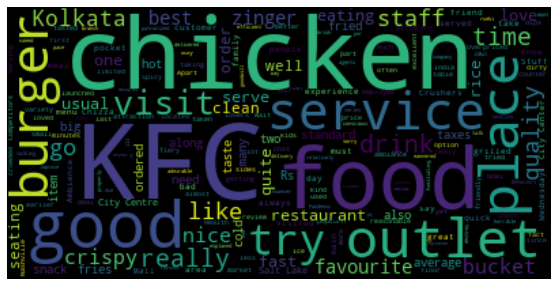

In [115]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");

In [116]:
df['sentiment'] = df['Ratings'].apply(lambda rating : +1 if rating >= 3.0 else -1)

In [117]:
df

,Name,Ratings,Emotion,Comments,sentiment
0,KunalK_13,1.0,Horrible experience with KFC salt lake,"Food was horrible , may be due to Pandemic the...",-1
1,moogul818,5.0,Standard KFC Fare- City Centre Mall 1,This outlet is on the first floor of the City ...,1
2,animeshpat,3.0,"Average food, overpriced","Average food quality, Overpriced as per qualit...",1
3,shivaraikod,3.0,Good service,The service and the way orders are taken and d...,1
4,gourabg334,4.0,What more to say about KFC,Chicken lovers need no review to visit KFC. He...,1
5,Vacation8252201,1.0,KFC staff I'll mannered,I m really sorry to say about itBut KFC staff ...,-1
6,Louisa Jane,3.0,i love kfc but.,im not talking about this branch but they need...,1
7,Niladri S8Reviewed,4.0,As usual,this KFC is just like allother Kfc chains. Foo...,1
8,Prasad_Siriwardena,4.0,Good fast food outlet,Convenient place to have fast food. prices are...,1
9,Jam4ika,1.0,Poor,I have no idea why cheap fast food which costs...,-1


In [118]:
df=df.drop([45, 46])

In [119]:
df

,Name,Ratings,Emotion,Comments,sentiment
0,KunalK_13,1.0,Horrible experience with KFC salt lake,"Food was horrible , may be due to Pandemic the...",-1
1,moogul818,5.0,Standard KFC Fare- City Centre Mall 1,This outlet is on the first floor of the City ...,1
2,animeshpat,3.0,"Average food, overpriced","Average food quality, Overpriced as per qualit...",1
3,shivaraikod,3.0,Good service,The service and the way orders are taken and d...,1
4,gourabg334,4.0,What more to say about KFC,Chicken lovers need no review to visit KFC. He...,1
5,Vacation8252201,1.0,KFC staff I'll mannered,I m really sorry to say about itBut KFC staff ...,-1
6,Louisa Jane,3.0,i love kfc but.,im not talking about this branch but they need...,1
7,Niladri S8Reviewed,4.0,As usual,this KFC is just like allother Kfc chains. Foo...,1
8,Prasad_Siriwardena,4.0,Good fast food outlet,Convenient place to have fast food. prices are...,1
9,Jam4ika,1.0,Poor,I have no idea why cheap fast food which costs...,-1


In [120]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [121]:
stopwords.update(["br", "href","KFC", "Chicken", "outlet", "place", "food"])

In [122]:
pos = " ".join(check for check in positive.Emotion)

In [123]:
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

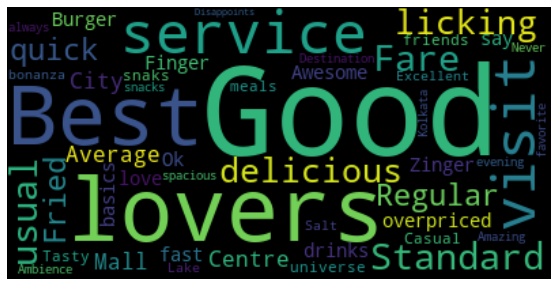

In [124]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear');
plt.axis("off");

In [125]:
neg = " ".join(review for review in negative.Emotion)

In [126]:
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

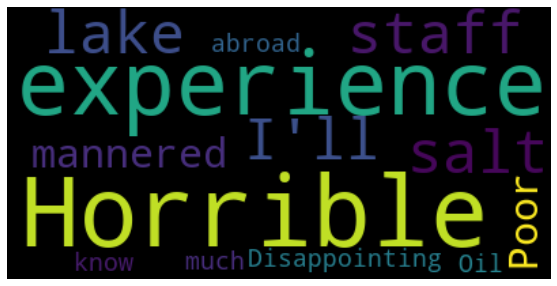

In [127]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear');
plt.axis("off");

In [128]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})

In [129]:
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="green",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='KFC INDIA SENTIMENTS', title_font_color="black", title_font_family="Times New Roman",

                  title_font_size=25)

In [130]:
df.to_csv("India_kfc_final.csv")

In [131]:
s2=pd.DataFrame([{"Sentiments":"Positive", "Count":39}, {"Sentiments":"Negative", "Count":6}])
s2.rename(index={0:"KFC_INDIA", 1:"KFC_INDIA"}, inplace=True)

In [132]:
Percentage=[39/45*100, 6/45*100]
s2["Percentage"]=Percentage
s2["Percentage"]=round(s2["Percentage"], 2).astype(str) + '%'
s2

,Count,Sentiments,Percentage
KFC_INDIA,39,Positive,86.67%
KFC_INDIA,6,Negative,13.33%


In [133]:
from nltk.tokenize import word_tokenize

In [134]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/gambler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:
a=list(df['Comments'].apply(word_tokenize))

# Factors Review of KFC India

## Visualization

### 1. Price review

In [136]:
#india price kfc

In [137]:
count=0
for column in df["Emotion"]:
    if "overpriced" in column:
        count=count+1
    if "Poor" in column:
        count=count+1
    if "Horrible" in column:
        count=count+1

In [138]:
price_india=["Reasonable price", "Non-reasonable price"]
consumer_india=[44/45*100, 3/45*100]
consumer_india = [round(num, 2) for num in consumer_india]
color_l1=["Green", "Red"]

Text(0.5, 0, 'KFC India')

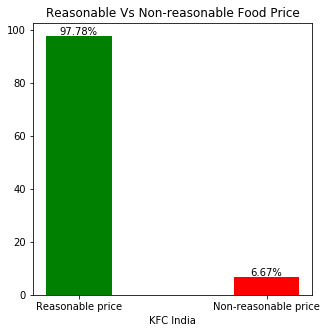

In [139]:
width=0.35

fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(price_india, consumer_india, width, align='center', color=color_l1)
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Reasonable Vs Non-reasonable Food Price");
plt.xlabel("KFC India")

In [140]:
s4=pd.DataFrame([{"Price":"Reasonable", "Count":44}, {"Price":"Non-reasonable", "Count":3}])
s4.rename(index={0:"KFC_INDIA", 1:"KFC_INDIA"}, inplace=True)
s4

,Count,Price
KFC_INDIA,44,Reasonable
KFC_INDIA,3,Non-reasonable


### 2. Quality

In [141]:
count=0
for column in df["Comments"]:
    if "Not good for health" in column:
        count=count+1
    if "chicken broke" in column:
        count=count+1
    if "need to improve" in column:
        count=count+1
    if "KFC standards" in column:
        count=count+1

In [142]:
quality_india=["Good quality food", "Bad quality food"]
consumer_india=[43/45*100, 4/45*100]
consumer_india = [round(num, 2) for num in consumer_india]
color_l1=["Green", "Red"]

Text(0.5, 0, 'KFC India')

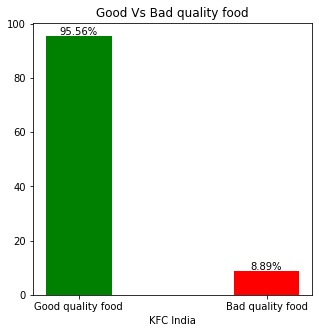

In [143]:
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(quality_india, consumer_india, width, align='center', color=color_l1)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Good Vs Bad quality food");
plt.xlabel("KFC India")

In [144]:
s6=pd.DataFrame([{"Food_Quality":"Good", "Count":43}, {"Food_Quality":"Bad", "Count":2}])
s6.rename(index={0:"KFC_INDIA", 1:"KFC_INDIA"}, inplace=True)
s6

,Count,Food_Quality
KFC_INDIA,43,Good
KFC_INDIA,2,Bad


### 3. Taste

In [145]:
count=0
for column in df["Emotion"]:
    if "Tasty" in column:
        count=count+1
    if "Good" in column:
        count=count+1
    if "good" in column:
        count=count+1
    if "Delicious" in column:
        count=count+1
    if "love" in column:
        count=count+1
    if "lovers" in column:
        count=count+1
    if "Amazing" in column:
        count=count+1
    if "Amazing!" in column:
        count=count+1
    if "lake" in column:
        count=count+1
    if "Best" in column:
        count=count+1
    if "best" in column:
        count=count+1
    if "Excellent" in column:
        count=count+1
    if "Regular" in column:
        count=count+1
    if "favorite" in column:
        count=count+1
    if "chicken" in column:
        count=count+1
print(count)

35


In [146]:
quality_india=["Tasty", "Not tasty"]
taste_india=[35/45*100, 10/45*100]
taste_india = [round(num, 2) for num in taste_india]
color_l1=["Green", "Red"]

Text(0.5, 0, 'KFC India')

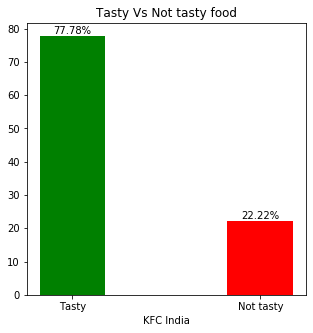

In [147]:
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(quality_india, taste_india, width, align='center', color=color_l1)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Tasty Vs Not tasty food");
plt.xlabel("KFC India")

In [148]:
s8=pd.DataFrame([{"Taste":"Tasty", "Count":35}, {"Taste":"Not tasty", "Count":10}])
s8.rename(index={0:"KFC_INDIA", 1:"KFC_INDIA"}, inplace=True)
s8

,Count,Taste
KFC_INDIA,35,Tasty
KFC_INDIA,10,Not tasty


### 4. Services

In [149]:
count=0
for column in df["Comments"]:
    if "serve" in column:
        count=count+1
    if "horrible" in column:
        count=count+1
    if "Behaviors" in column:
        count=count+1
    if "Staff" in column:
        count=count+1
    if "staff" in column:
        count=count+1

In [150]:
quality_india=["Good services", "Bad services"]
service_india=[29/45*100, 16/45*100]
service_india = [round(num, 2) for num in service_india]
color_l1=["Green", "Red"]

Text(0.5, 0, 'KFC India')

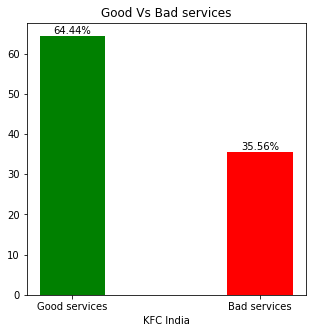

In [151]:
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(quality_india, service_india, width, align='center', color=color_l1)
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Good Vs Bad services");
plt.xlabel("KFC India")

In [199]:
s10=pd.DataFrame([{"Services":"Good", "Number of reviews":29}, {"Services":"Bad", "Number of reviews":16}])
s10.rename(index={0:"KFC_INDIA", 1:"KFC_INDIA"}, inplace=True)
s10

,Number of reviews,Services
KFC_INDIA,29,Good
KFC_INDIA,16,Bad


# Analysis and Visualisation of KFC UK

In [152]:
df1=pd.read_excel("KFC_UK_Reviews.xlsx")

In [153]:
df1.drop([45, 46], inplace=True)

In [154]:
df1

,Name,Ratings,Emotion,Comments
0,NGNicole Gaffney,5.0,This is my favourite place,"This is my favourite place, they do the best c..."
1,Hayley Hopkins,1.0,Hot wings,Walked all the way there for them to forget my...
2,Angry consumer,1.0,Kfc chesterfield,Absolute rubbish. Freezing cold. Stopped order...
3,SU,1.0,KFC Hengrove,"KFC Hengrove, Bristol. The service is terrible..."
4,John M Robinson,4.0,Cold fries awesome chicken,As always the chicken was lovely but unfortuna...
5,Jack Lambert,1.0,I would rather eat from a hospital sick bowl,So much missing and very poor not worth the dr...
6,David Tate,1.0,KFC in Starbeck,"KFC in Starbeck, burnt cold chicken, everythin..."
7,Imogen,1.0,The worksop kfc,"The worksop kfc, really doesn’t care about hyg..."
8,Darren Smith,1.0,Junction 1 rugby KFC,Junction 1 rugby KFC has to be the worst franc...
9,AMANDA & ANDY,1.0,BYE BYE,"unable to order online from anywhere, ended up..."


In [155]:
df1["Comments"]=df1["Comments"].values.astype(str)
df1["Emotion"]=df1["Emotion"].values.astype(str)

In [156]:
df1.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 4 columns):
Name        45 non-null object
Ratings     45 non-null float64
Emotion     45 non-null object
Comments    45 non-null object
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [157]:
fig = px.histogram(df1, x="Ratings")

In [158]:
fig.update_traces(marker_color="orangered",marker_line_color='rgb(8,48,107)', marker_line_width=2.5)
fig.update_layout(title_text='KFC UK RATINGS', title_font_color="black", title_font_family="Times New Roman",
                 title_font_size=25)

In [159]:
counting_ratings1=df1["Ratings"].value_counts()
df_ratings2=pd.DataFrame(counting_ratings1)
df_ratings2=df_ratings2.rename(columns={"Ratings": "Count"})
df_ratings2.reset_index(inplace=True)
df_ratings_overall1=df_ratings2.rename(columns={"index": "Ratings"})
df_ratings_overall1["Percentage"]=round(df_ratings_overall1["Count"]/45*100, 2).astype(str) + '%'
df_ratings_overall1

,Ratings,Count,Percentage
0,1.0,39,86.67%
1,2.0,2,4.44%
2,4.0,2,4.44%
3,5.0,2,4.44%


In [160]:
senti2 = " ".join(review for review in df1.Comments)

In [161]:
wordcloud1 = WordCloud(stopwords=stopwords).generate(senti2)

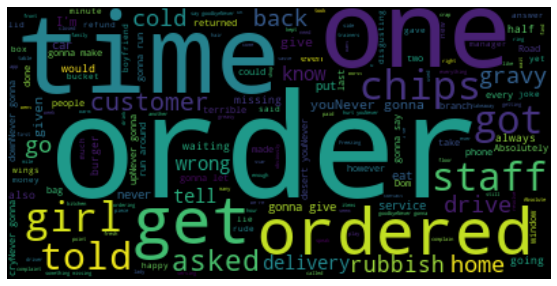

In [162]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear');
plt.axis("off");

In [163]:
df1['sentiment'] = df1['Ratings'].apply(lambda rating : +1 if rating >= 3.0 else -1)

In [164]:
df1.head()

,Name,Ratings,Emotion,Comments,sentiment
0,NGNicole Gaffney,5.0,This is my favourite place,"This is my favourite place, they do the best c...",1
1,Hayley Hopkins,1.0,Hot wings,Walked all the way there for them to forget my...,-1
2,Angry consumer,1.0,Kfc chesterfield,Absolute rubbish. Freezing cold. Stopped order...,-1
3,SU,1.0,KFC Hengrove,"KFC Hengrove, Bristol. The service is terrible...",-1
4,John M Robinson,4.0,Cold fries awesome chicken,As always the chicken was lovely but unfortuna...,1


In [165]:
positive = df1[df['sentiment'] == 1]
negative = df1[df['sentiment'] == -1]

In [166]:
stopwords.update(["br", "href","one", "time", "chips", "order", "get", "ordered"])

In [167]:
pos1 = " ".join(check for check in positive.Emotion)

In [168]:
wordcloud4 = WordCloud(stopwords=stopwords).generate(pos1)

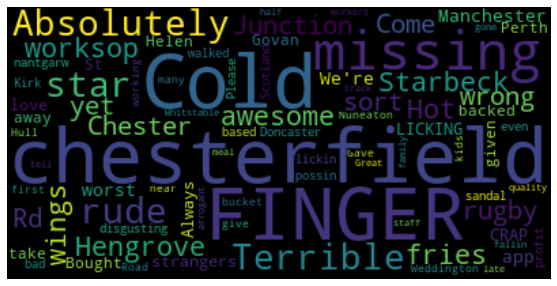

In [169]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4, interpolation='bilinear');
plt.axis("off");

In [170]:
neg1 = " ".join(review for review in negative.Emotion)
wordcloud5 = WordCloud(stopwords=stopwords).generate(neg1)

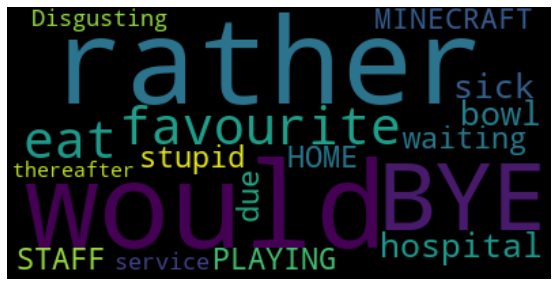

In [171]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud5, interpolation='bilinear');
plt.axis("off");

In [172]:
df1['sentimentt'] = df1['sentiment'].replace({-1 : 'negative'})
df1['sentimentt'] = df1['sentimentt'].replace({1 : 'positive'})

In [173]:
fig = px.histogram(df1, x="sentimentt")
fig.update_traces(marker_color="orangered",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='KFC UK SENTIMENTS', title_font_color="black", title_font_family="Times New Roman",

                  title_font_size=25)

In [174]:
s1=pd.DataFrame([{"Sentiments":"Positive", "Count":4}, {"Sentiments":"Negative", "Count":41}])
s1.rename(index={0:"KFC_UK", 1:"KFC_UK"}, inplace=True)

In [175]:
Percentage=[4/45*100, 41/45*100]
s1["Percentage"]=Percentage
s1["Percentage"]=round(s1["Percentage"], 2).astype(str) + '%'
s1

,Count,Sentiments,Percentage
KFC_UK,4,Positive,8.89%
KFC_UK,41,Negative,91.11%


In [176]:
df1.to_csv("uk_kfc_final.csv")

In [177]:
dfuk=pd.read_csv("uk_kfc_final.csv")
dfindia=pd.read_csv("India_kfc_final.csv")

In [178]:
dfuk=dfuk.rename(columns={"Name": "British_consumer", "Ratings": "UK_Ratings", "Emotion": "UK_Emotion", "Comments":
                     "UK_Comments", "sentiment": "UK_Sentiment", "sentimentt": "UK_Sentiment_word"
                      })

In [179]:
dfindia=dfindia.rename(columns={"Name": "Indian_consumer", "Ratings": "India_Ratings", "Emotion": "India_Emotion", "Comments":
                     "India_Comments", "sentiment": "India_Sentiment", "sentimentt": "India_Sentiment_word"
                      })

In [180]:
listdfukindia=[dfuk, dfindia]

In [181]:
uk_india_df=pd.concat(listdfukindia, axis=1)

In [182]:
uk_india_df= uk_india_df.loc[:, ~uk_india_df.columns.str.contains('^Unnamed')]

In [183]:
uk_india_df

,British_consumer,UK_Ratings,UK_Emotion,UK_Comments,UK_Sentiment,UK_Sentiment_word,Indian_consumer,India_Ratings,India_Emotion,India_Comments,India_Sentiment,India_Sentiment_word
0,NGNicole Gaffney,5.0,This is my favourite place,"This is my favourite place, they do the best c...",1,positive,KunalK_13,1.0,Horrible experience with KFC salt lake,"Food was horrible , may be due to Pandemic the...",-1,negative
1,Hayley Hopkins,1.0,Hot wings,Walked all the way there for them to forget my...,-1,negative,moogul818,5.0,Standard KFC Fare- City Centre Mall 1,This outlet is on the first floor of the City ...,1,positive
2,Angry consumer,1.0,Kfc chesterfield,Absolute rubbish. Freezing cold. Stopped order...,-1,negative,animeshpat,3.0,"Average food, overpriced","Average food quality, Overpriced as per qualit...",1,positive
3,SU,1.0,KFC Hengrove,"KFC Hengrove, Bristol. The service is terrible...",-1,negative,shivaraikod,3.0,Good service,The service and the way orders are taken and d...,1,positive
4,John M Robinson,4.0,Cold fries awesome chicken,As always the chicken was lovely but unfortuna...,1,positive,gourabg334,4.0,What more to say about KFC,Chicken lovers need no review to visit KFC. He...,1,positive
5,Jack Lambert,1.0,I would rather eat from a hospital sick bowl,So much missing and very poor not worth the dr...,-1,negative,Vacation8252201,1.0,KFC staff I'll mannered,I m really sorry to say about itBut KFC staff ...,-1,negative
6,David Tate,1.0,KFC in Starbeck,"KFC in Starbeck, burnt cold chicken, everythin...",-1,negative,Louisa Jane,3.0,i love kfc but.,im not talking about this branch but they need...,1,positive
7,Imogen,1.0,The worksop kfc,"The worksop kfc, really doesn’t care about hyg...",-1,negative,Niladri S8Reviewed,4.0,As usual,this KFC is just like allother Kfc chains. Foo...,1,positive
8,Darren Smith,1.0,Junction 1 rugby KFC,Junction 1 rugby KFC has to be the worst franc...,-1,negative,Prasad_Siriwardena,4.0,Good fast food outlet,Convenient place to have fast food. prices are...,1,positive
9,AMANDA & ANDY,1.0,BYE BYE,"unable to order online from anywhere, ended up...",-1,negative,Jam4ika,1.0,Poor,I have no idea why cheap fast food which costs...,-1,negative


In [203]:
uk_india_df.to_csv("UK_India_dataframe.csv")

# Factors Review of KFC UK

## Visualization

### 1. Price review

Text(0.5, 0, 'KFC UK')

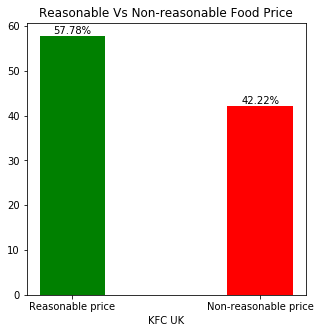

In [184]:
price_uk=["Reasonable price", "Non-reasonable price"]
consumer_uk=[26/45*100, 19/45*100]
consumer_uk = [round(num, 2) for num in consumer_uk]
color_l1=["Green", "Red"]
width=0.35
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(price_uk, consumer_uk, width, align='center', color=color_l1)
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Reasonable Vs Non-reasonable Food Price");
plt.xlabel("KFC UK")

In [185]:
s3=pd.DataFrame([{"Price":"Reasonable", "Count":26}, {"Price":"Non-reasonable", "Count":19}])
s3.rename(index={0:"KFC_UK", 1:"KFC_UK"}, inplace=True)
s3

,Count,Price
KFC_UK,26,Reasonable
KFC_UK,19,Non-reasonable


### 2. Quality

Text(0.5, 0, 'KFC UK')

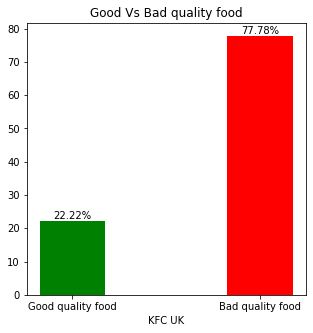

In [186]:
quality_quk=["Good quality food", "Bad quality food"]
consumer_quk=[10/45*100, 35/45*100]
consumer_quk = [round(num, 2) for num in consumer_quk]
color_l1=["Green", "Red"]
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(quality_quk, consumer_quk, width, align='center', color=color_l1)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Good Vs Bad quality food");
plt.xlabel("KFC UK")

In [187]:
s5=pd.DataFrame([{"Food_Quality":"Good", "Count":10}, {"Food_Quality":"Bad", "Count":35}])
s5.rename(index={0:"KFC_UK", 1:"KFC_UK"}, inplace=True)
s5

,Count,Food_Quality
KFC_UK,10,Good
KFC_UK,35,Bad


### 3. Taste

In [188]:
taste_tuk=["Tasty", "Not tasty"]
taste_uk=[12/45*100, 33/45*100]
taste_uk = [round(num, 2) for num in taste_uk]
color_l1=["Green", "Red"]

Text(0.5, 0, 'KFC UK')

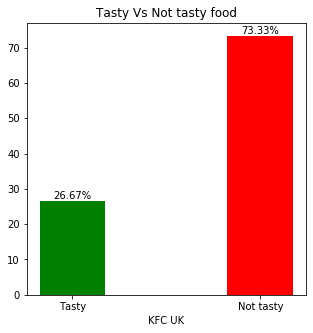

In [189]:
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(taste_tuk, taste_uk, width, align='center', color=color_l1)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Tasty Vs Not tasty food");
plt.xlabel("KFC UK")

In [190]:
s7=pd.DataFrame([{"Taste":"Tasty", "Count":12}, {"Taste":"Not tasty", "Count":33}])
s7.rename(index={0:"KFC_UK", 1:"KFC_UK"}, inplace=True)
s7

,Count,Taste
KFC_UK,12,Tasty
KFC_UK,33,Not tasty


### 4. Services

Text(0.5, 0, 'KFC UK')

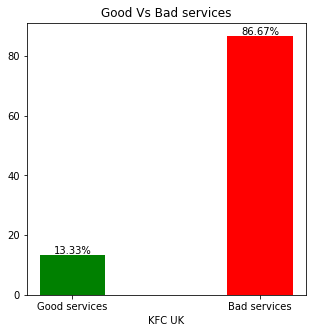

In [191]:
service_suk=["Good services", "Bad services"]
service_uk=[6/45*100, 39/45*100]
service_uk = [round(num, 2) for num in service_uk]
color_l1=["Green", "Red"]
fig, ax = plt.subplots(figsize=(5,5))
pps = ax.bar(service_suk, service_uk, width, align='center', color=color_l1)
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.5,
      s="{}%".format(height),
      ha='center')
plt.title("Good Vs Bad services");
plt.xlabel("KFC UK")

In [198]:
s9=pd.DataFrame([{"Services":"Good", "Number of reviews":6}, {"Services":"Bad", "Number of reviews":39}])
s9.rename(index={0:"KFC_UK", 1:"KFC_UK"}, inplace=True)
s9

,Number of reviews,Services
KFC_UK,6,Good
KFC_UK,39,Bad


### Sentiment Comparison

In [192]:
ss=[s1, s2]
ss1=pd.concat(ss, axis=0)
ss1

,Count,Sentiments,Percentage
KFC_UK,4,Positive,8.89%
KFC_UK,41,Negative,91.11%
KFC_INDIA,39,Positive,86.67%
KFC_INDIA,6,Negative,13.33%


### Price Comparison

In [193]:
ss2=[s3, s4]
ss3=pd.concat(ss2, axis=0)
ss3

,Count,Price
KFC_UK,26,Reasonable
KFC_UK,19,Non-reasonable
KFC_INDIA,44,Reasonable
KFC_INDIA,3,Non-reasonable


### Quality Comparison

In [194]:
ss3=[s5, s6]
ss4=pd.concat(ss3, axis=0)
ss4

,Count,Food_Quality
KFC_UK,10,Good
KFC_UK,35,Bad
KFC_INDIA,43,Good
KFC_INDIA,2,Bad


### Taste Comparison

In [195]:
ss5=[s7, s8]
ss6=pd.concat(ss5, axis=0)
ss6

,Count,Taste
KFC_UK,12,Tasty
KFC_UK,33,Not tasty
KFC_INDIA,35,Tasty
KFC_INDIA,10,Not tasty


### Services comparison

In [200]:
ss7=[s9, s10]
ss8=pd.concat(ss7, axis=0)
ss8

,Number of reviews,Services
KFC_UK,6,Good
KFC_UK,39,Bad
KFC_INDIA,29,Good
KFC_INDIA,16,Bad
